# **Classification(overfit and regularization !)**

In [63]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
X = np.array([ [1,2] , [1.5,2], [0.5,0.5] , [1.5,1.5] , [3.5,3.7] , [4,4] , [3,3.5] , [4,3] , [5,5]])
y = np.array( [0,0,0,0,1,1,1,1,1] )

In [65]:
order = 3

In [66]:
def data_order(X, order):
    X = np.c_[np.ones(len(X)), X]
    for i in range(2, order+1):
        X = np.c_[X, X[:,1]**i, X[:,2]**i]

    return X

X = data_order(X, order)
print(X)

[[  1.      1.      2.      1.      4.      1.      8.   ]
 [  1.      1.5     2.      2.25    4.      3.375   8.   ]
 [  1.      0.5     0.5     0.25    0.25    0.125   0.125]
 [  1.      1.5     1.5     2.25    2.25    3.375   3.375]
 [  1.      3.5     3.7    12.25   13.69   42.875  50.653]
 [  1.      4.      4.     16.     16.     64.     64.   ]
 [  1.      3.      3.5     9.     12.25   27.     42.875]
 [  1.      4.      3.     16.      9.     64.     27.   ]
 [  1.      5.      5.     25.     25.    125.    125.   ]]


In [67]:
X.max(axis=0)

array([  1.,   5.,   5.,  25.,  25., 125., 125.])

In [68]:
def norm_data(X):
    X /= X.max(axis=0)

    return(X)

X = norm_data(X)
print(X)

[[1.       0.2      0.4      0.04     0.16     0.008    0.064   ]
 [1.       0.3      0.4      0.09     0.16     0.027    0.064   ]
 [1.       0.1      0.1      0.01     0.01     0.001    0.001   ]
 [1.       0.3      0.3      0.09     0.09     0.027    0.027   ]
 [1.       0.7      0.74     0.49     0.5476   0.343    0.405224]
 [1.       0.8      0.8      0.64     0.64     0.512    0.512   ]
 [1.       0.6      0.7      0.36     0.49     0.216    0.343   ]
 [1.       0.8      0.6      0.64     0.36     0.512    0.216   ]
 [1.       1.       1.       1.       1.       1.       1.      ]]


In [69]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Last Cost: 0.5444567119904862


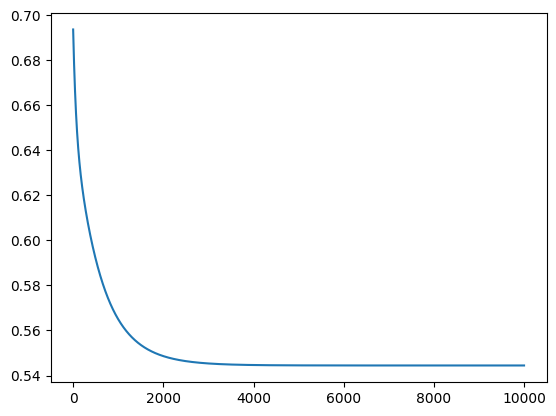

In [70]:
w = np.zeros(len(X[0]))
alpha = 0.01
m = len(X)
cost = []
l = 1

for epoch in range(10000):
    y_hat = sigmoid(X.dot(w))
    grad = (1/m) * X.T.dot(y_hat-y) + (l/m * w)
    w -= alpha * grad

    J = (-1/m) * ( y*np.log(y_hat) + (1-y)*np.log(1-y_hat) ).sum()+ (l/(2*m) * w.sum())
    cost.append(J)

plt.plot(cost)
print(f'Last Cost: {cost[-1]}')

In [71]:
'''
y_hat = sigmoid(z)
z = 0

W.X = 0

w0*x0 + w1*x1 + w2*x2 + w3*x1**2 + w4*x2**2 + w5*x1**3 + w6*x2**3 = 0
x1 , wj : given
x2 > ?
'''

def newton(f,Df,x0,epsilon,max_iter):
    xn = x0
    for n in range(0,max_iter):
        fxn = f(xn)
        if abs(fxn) < epsilon:
            #print('Found solution after',n,'iterations.')
            return xn
        Dfxn = Df(xn)
        if Dfxn == 0:
            #print('Zero derivative. No solution found.')
            return None
        xn = xn - fxn/Dfxn
    #print('Exceeded maximum iterations. No solution found.')
    return None

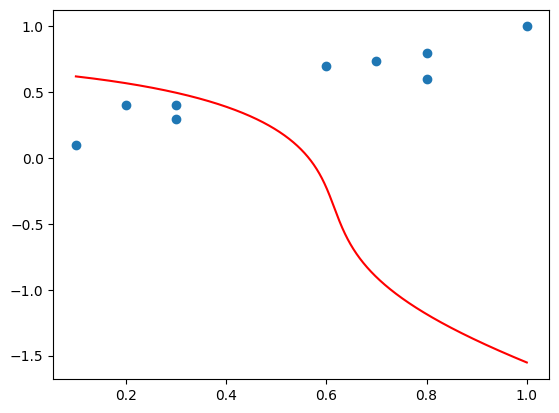

In [72]:
'''
y_hat = sigmoid(z)
z = 0

W.X = 0

w0*x0 + w1*x1 + w2*x2 + w3*x1**2 + w4*x2**2 + w5*x1**3 + w6*x2**3 = 0
x1 , wj : given
x2 : ?
'''

X1 = np.linspace(min(X[:,1]), max(X[:,1]), 10000)

# x2 > ?

X2 = []
for i in X1:
    x1 = i
    if order == 3:
        p = lambda x2: w[0] + w[1]*x1 + w[2]*x2 + w[3]*x1**2 + w[4]*x2**2 + w[5]*x1**3 + w[6]*x2**3
        Dp = lambda x2: w[2] + 2*w[4]*x2 + 3*w[6]*x2**2
    elif order == 2:
        p = lambda x2: w[0] + w[1]*x1 + w[2]*x2 + w[3]*x1**2 + w[4]*x2**2
        Dp = lambda x2: w[2] + 2*w[4]*x2
    X2.append(newton(p,Dp,1,1e-10,10000))

plt.scatter(X[:,1], X[:,2])
plt.plot(X1, X2, c='r')